# Recommendtion System for Ecommerce Shop

#### Importing packages

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline
print("import complete")

import complete


#### Data Importation

In [2]:

data = pd.read_csv('ratings_beauty.csv')
print("Import complete")

Import complete


#### Data exploration

In [3]:
#Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


In [4]:
#summarize the data
data.describe()

,Rating,Timestamp
count,2.023070e+06,2.023070e+06
mean,4.149036e+00,1.360389e+09
std,1.311505e+00,4.611860e+07
min,1.000000e+00,9.087552e+08
25%,4.000000e+00,1.350259e+09
50%,5.000000e+00,1.372810e+09
75%,5.000000e+00,1.391472e+09
max,5.000000e+00,1.406074e+09


In [5]:
#Shape of the data
data.shape

(2023070, 4)

In [6]:
#Displaying the first five columns of the data
data.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [7]:
data.tail()

,UserId,ProductId,Rating,Timestamp
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0,1405296000
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0,1405296000
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0,1405382400
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0,1405555200
2023069,A1PB6OT0OOPKNQ,B00LU0LTOU,5.0,1405641600


In [8]:
#checking for missing values
data.isnull().sum()

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

### Visualization

In [9]:
#Importing Seaborn - a visualization library
import seaborn as sns

<AxesSubplot:xlabel='Rating', ylabel='count'>

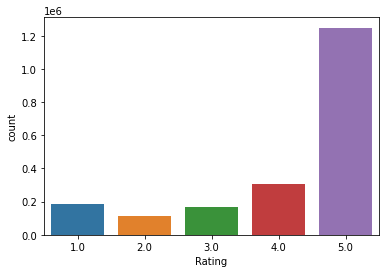

In [10]:
#Count number of every ratng graphically
sns.countplot(x='Rating', data=data)

In [11]:
#How many users have given a particular rating
data.groupby('Rating')['UserId'].count()

Rating
1.0     183784
2.0     113034
3.0     169791
4.0     307740
5.0    1248721
Name: UserId, dtype: int64

### Data Preprocesing

In [12]:
#removing timestamp column because we don't need it.
data.drop('Timestamp', inplace= True, axis= 1)
data

,UserId,ProductId,Rating
0,A39HTATAQ9V7YF,0205616461,5.0
1,A3JM6GV9MNOF9X,0558925278,3.0
2,A1Z513UWSAAO0F,0558925278,5.0
3,A1WMRR494NWEWV,0733001998,4.0
4,A3IAAVS479H7M7,0737104473,1.0
...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0


In [13]:
#create a dataframe with average rating in one column
rating= pd.DataFrame(data.groupby('ProductId')['Rating'].mean().sort_values(ascending=False))

#create another column with number of rating given to that product
rating['number of rating'] = pd.DataFrame(data.groupby('ProductId')['Rating'].count().sort_values(ascending=False))
rating.sort_values('number of rating',ascending=False)

,Rating,number of rating
ProductId,,
B001MA0QY2,4.321386,7533
B0009V1YR8,3.568839,2869
B0043OYFKU,4.310456,2477
B0000YUXI0,4.405040,2143
B003V265QW,4.365421,2088
...,...,...
B0013H228W,5.000000,1
B0013GNAIE,5.000000,1
B0013GNAG6,5.000000,1


In [14]:
#Checking number of unique users
data['UserId'].nunique()
# data.ProductId.nunique()

1210271

In [15]:
#Reducing sample size
print(data.shape)
data = data.sample(n=10000)
data.shape


(2023070, 3)


(10000, 3)

<AxesSubplot:xlabel='Rating', ylabel='count'>

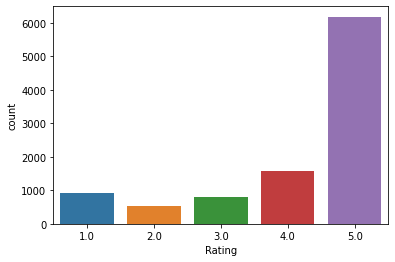

In [16]:
sns.countplot(x='Rating', data=data)

In [17]:
data.head()

,UserId,ProductId,Rating
477010,A318JO0B9L1PSD,B000XE7MTU,5.0
1497920,A2Z57XECWIUYKU,B006FLY0UE,5.0
169025,A1792Z9MOQHY2,B000AA5VBI,5.0
1054644,A2RLPYOQDA46LZ,B003IK9SLQ,5.0
2000964,A3US0VOOEK3VZ8,B00I45A4K4,5.0


In [19]:
#create a dataframe with average rating in one column
rating= pd.DataFrame(data.groupby('ProductId')['Rating'].mean().sort_values(ascending=False))

#create another column with number of rating given to that product
rating['number of rating'] = pd.DataFrame(data.groupby('ProductId')['Rating'].count().sort_values(ascending=False))
rating.sort_values('number of rating',ascending=False)

,Rating,number of rating
ProductId,,
B001MA0QY2,4.151515,33
B0043OYFKU,4.050000,20
B004OHQR1Q,4.368421,19
B0009V1YR8,3.777778,18
B0069FDR96,4.083333,12
...,...,...
B007O38HA6,5.000000,1
B007OSWD7O,5.000000,1
B007OT1OPU,5.000000,1


<AxesSubplot:xlabel='ProductId'>

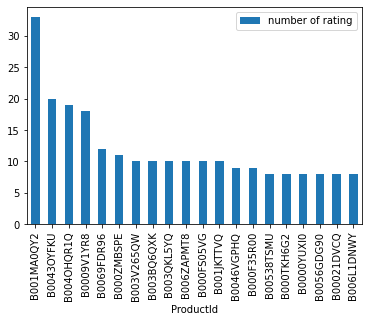

In [20]:
#Top 20 products sell by ecommerce website shown graphically

rating[['number of rating']].sort_values('number of rating',ascending=False).head(20).plot(kind='bar')

In [21]:
#Top 5 most popular products to be recommended to a new user
popular_products = rating[['number of rating']].sort_values('number of rating',ascending=False).head()
popular_products

,number of rating
ProductId,
B001MA0QY2,33
B0043OYFKU,20
B004OHQR1Q,19
B0009V1YR8,18
B0069FDR96,12


### Machine Learning

In [22]:
#create a user item matrix. 
ratings_utility_matrix = data.pivot_table(values='Rating', index='UserId', columns='ProductId')
ratings_utility_matrix.head(10)

ProductId,978807247X,9788073417,9788075630,9790771444,9790777884,9790778309,9790780532,9790785755,9790788584,9790798288,...,B00KHGIK54,B00KK62714,B00KMCFFZQ,B00KMESLE6,B00KNIL36E,B00KPKIV8I,B00KQVTX06,B00L3KEIZO,B00L5JHZJO,B00LFWG7EU
UserId,,,,,,,,,,,,,,,,,,,,,
A00260721BZWSYAKGDLGW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A00414041RD0BXM6WK0GX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0081289HG0BXFQJQUWW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A015465615X2I0N4NKDEQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A03248122VLNHWZ01F8O4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A04820554O4ZHILMKEAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0552124K4RUH962OO8R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A061017736IP90EP7R64L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A06861541QJ8B7EKT7QE5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
ratings_utility_matrix.shape

(9898, 8111)

In [24]:
ratings_utility_matrix.fillna(0, inplace=True)

In [25]:
# Transpose the matrix
X = ratings_utility_matrix.T

In [26]:
X.head()

UserId,A00260721BZWSYAKGDLGW,A00414041RD0BXM6WK0GX,A0081289HG0BXFQJQUWW,A015465615X2I0N4NKDEQ,A03248122VLNHWZ01F8O4,A04820554O4ZHILMKEAC,A0552124K4RUH962OO8R,A061017736IP90EP7R64L,A06861541QJ8B7EKT7QE5,A0769605MEI8XL3K2O49,...,AZWSGSUAZXMGY,AZWV6MUFHBO0V,AZXCLL48VMQRP,AZXNMJ57QAZ9N,AZYC9N0E0VAV3,AZYLV04HSRQQ8,AZYXC63SS008M,AZYZU9NT6KW8Z,AZZI45TVONAY3,AZZK0RL5JFVKO
ProductId,,,,,,,,,,,,,,,,,,,,,
978807247X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9788073417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9788075630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9790771444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9790777884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
X.shape

(8111, 9898)

#### Decomposing the matrix using TruncatedSVD, It is a dimensionality reduction technique.

In [28]:
from sklearn.decomposition import TruncatedSVD

In [29]:
#n_component is desired dimension of output data
SVD = TruncatedSVD(n_components=10) 
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix

array([[ 5.66674865e-10,  1.42090684e-07,  4.73143468e-07, ...,
         7.42129653e-06, -1.46967305e-05,  2.66238840e-05],
       [ 2.30767866e-08,  3.76621351e-07, -3.88651271e-08, ...,
         1.10822494e-05, -1.37072790e-06,  3.13686237e-05],
       [ 2.65816743e-08,  1.69342248e-06, -4.16733353e-07, ...,
         7.80605416e-06, -2.07287417e-05, -3.05822275e-05],
       ...,
       [-1.61648336e-08, -1.30977006e-06,  1.08244364e-08, ...,
        -1.56898097e-05,  4.12766919e-06,  1.10636436e-05],
       [-1.00805521e-06,  5.86097972e-06, -2.39082277e-05, ...,
        -1.37182666e-04,  3.87776952e-04, -8.62668567e-04],
       [-1.62066432e-08,  3.17313357e-07,  8.35455248e-07, ...,
         1.44551610e-06,  8.81424314e-06, -2.10794397e-05]])

In [30]:
decomposed_matrix.shape

(8111, 10)

In [31]:
#corrcoef() returns the correlation matrix with correlation coefficient in it. 

correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix

array([[ 1.        ,  0.4492884 , -0.10813283, ..., -0.43365376,
        -0.79597551, -0.88818767],
       [ 0.4492884 ,  1.        , -0.4758114 , ...,  0.43027986,
        -0.85633083, -0.60346491],
       [-0.10813283, -0.4758114 ,  1.        , ..., -0.56794907,
         0.33718309,  0.31861731],
       ...,
       [-0.43365376,  0.43027986, -0.56794907, ...,  1.        ,
        -0.10846046,  0.04741429],
       [-0.79597551, -0.85633083,  0.33718309, ..., -0.10846046,
         1.        ,  0.83898452],
       [-0.88818767, -0.60346491,  0.31861731, ...,  0.04741429,
         0.83898452,  1.        ]])

In [32]:
correlation_matrix.shape

(8111, 8111)

In [33]:
#choose a random index
import random
i = random.randint(0,correlation_matrix.shape[0])
i

2242

In [34]:
#The Product ID of the product the customer purchased
product_ID = X.index[i]
product_ID

'B00175W3HK'

In [35]:
#All the correlation of those products which are correlated to the product that customer purchase
correlation_ProductId = correlation_matrix[i]

correlation_ProductId

array([ 0.44815601,  0.89485415, -0.57688553, ...,  0.58784276,
       -0.84229588, -0.69967136])

In [40]:
correlation_ProductId.shape

(8111,)

In [36]:
#Top products to be displayed by the recommendation system to the above customer based on the purchase history of other cutomers on website
recommended_products = X.index[correlation_ProductId > 0.90] 
recommended_products = list(recommended_products)

#Top 10 Products recommended to the user based on the purchase done by user
recommended_products[0:10]

['B000052YQU',
 'B000083XNC',
 'B0000E3QL7',
 'B0000UTUW4',
 'B00013TQRE',
 'B00015874U',
 'B0006ZHCK0',
 'B0007YJ5QY',
 'B0008ENT9C',
 'B0009953JU']